In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(3000/necoc)
generations

12

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

112


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/250".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/250
number of class1:1137
number of class2:480

 ****** Running generation 0 ****** 

Population's average fitness: 0.45004 stdev: 0.13787
Best fitness: 0.73036 - size: (2, 13) - species 3 - id 61
Average adjusted fitness: 0.197
Mean genetic distance 2.891, standard deviation 0.469
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 10.495 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54431 stdev: 0.16140
Best fitness: 0.74212 - size: (3, 15) - species 5 - id 243
Average adjusted fitness: 0.311
Mean genetic distance 2.992, standard deviation 0.453
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 8.332 sec (9.413 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59621 stdev: 0.14497
Best fitness: 0.78231 - size: (4, 16) - species 5 - id 542
Average adjusted fitness: 0.336
Mean genetic distance 3.056, standard deviation 0.453
Population of 202 members in 29 species


Population's average fitness: 0.47484 stdev: 0.14457
Best fitness: 0.74088 - size: (2, 13) - species 1 - id 130
Average adjusted fitness: 0.298
Mean genetic distance 2.923, standard deviation 0.457
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.326 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55231 stdev: 0.13540
Best fitness: 0.76314 - size: (2, 13) - species 24 - id 365
Average adjusted fitness: 0.304
Mean genetic distance 2.972, standard deviation 0.472
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 10.053 sec (9.190 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58776 stdev: 0.14210
Best fitness: 0.76747 - size: (4, 17) - species 26 - id 406
Average adjusted fitness: 0.311
Mean genetic distance 3.024, standard deviation 0.466
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 9.418 sec (9.266 average)

 ****** Running generation 3

Population's average fitness: 0.52065 stdev: 0.08908
Best fitness: 0.71243 - size: (2, 13) - species 1 - id 185
Average adjusted fitness: 0.190
Mean genetic distance 2.926, standard deviation 0.452
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.536 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55464 stdev: 0.09088
Best fitness: 0.72975 - size: (3, 15) - species 1 - id 376
Average adjusted fitness: 0.209
Mean genetic distance 3.036, standard deviation 0.464
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.731 sec (8.634 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56966 stdev: 0.09601
Best fitness: 0.76067 - size: (3, 15) - species 5 - id 464
Average adjusted fitness: 0.193
Mean genetic distance 3.076, standard deviation 0.466
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.040 sec (8.769 average)

 ****** Running generation 3 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.49908 stdev: 0.06127
Best fitness: 0.66790 - size: (2, 13) - species 6 - id 193
Average adjusted fitness: 0.210
Mean genetic distance 2.945, standard deviation 0.512
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 11.552 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53607 stdev: 0.06597
Best fitness: 0.68893 - size: (3, 14) - species 4 - id 229
Average adjusted fitness: 0.181
Mean genetic distance 3.028, standard deviation 0.501
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 11.214 sec (11.383 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54825 stdev: 0.06457
Best fitness: 0.70625 - size: (4, 16) - species 4 - id 534
Average adjusted fitness: 0.167
Mean genetic distance 3.107, standard deviation 0.484
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 10.905 sec (11.2


 ****** Running generation 0 ****** 

Population's average fitness: 0.53553 stdev: 0.14205
Best fitness: 0.77180 - size: (2, 13) - species 1 - id 98
Average adjusted fitness: 0.284
Mean genetic distance 2.843, standard deviation 0.448
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 9.773 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59608 stdev: 0.14901
Best fitness: 0.78850 - size: (3, 15) - species 2 - id 295
Average adjusted fitness: 0.310
Mean genetic distance 2.938, standard deviation 0.451
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 10.674 sec (10.223 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61710 stdev: 0.13833
Best fitness: 0.78850 - size: (3, 15) - species 2 - id 295
Average adjusted fitness: 0.354
Mean genetic distance 2.965, standard deviation 0.463
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.058 sec (9.835 a

Population's average fitness: 0.48027 stdev: 0.09467
Best fitness: 0.76809 - size: (2, 13) - species 7 - id 65
Average adjusted fitness: 0.273
Mean genetic distance 2.996, standard deviation 0.516
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.750 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54309 stdev: 0.09630
Best fitness: 0.77056 - size: (3, 15) - species 13 - id 246
Average adjusted fitness: 0.271
Mean genetic distance 3.039, standard deviation 0.505
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.186 sec (7.968 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57482 stdev: 0.09129
Best fitness: 0.77056 - size: (3, 15) - species 13 - id 246
Average adjusted fitness: 0.207
Mean genetic distance 3.068, standard deviation 0.502
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 8.381 sec (8.105 average)

 ****** Running generation 3 *

Population's average fitness: 0.46157 stdev: 0.14393
Best fitness: 0.76376 - size: (2, 13) - species 1 - id 114
Average adjusted fitness: 0.226
Mean genetic distance 2.915, standard deviation 0.458
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.847 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55888 stdev: 0.15925
Best fitness: 0.76500 - size: (3, 15) - species 6 - id 307
Average adjusted fitness: 0.301
Mean genetic distance 2.986, standard deviation 0.463
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.878 sec (8.362 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61764 stdev: 0.14004
Best fitness: 0.79654 - size: (4, 17) - species 24 - id 511
Average adjusted fitness: 0.310
Mean genetic distance 3.001, standard deviation 0.455
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 9.908 sec (8.878 average)

 ****** Running generation 3 *

Population's average fitness: 0.52381 stdev: 0.09167
Best fitness: 0.74706 - size: (2, 13) - species 6 - id 121
Average adjusted fitness: 0.256
Mean genetic distance 2.899, standard deviation 0.489
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 9.282 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55173 stdev: 0.09915
Best fitness: 0.77180 - size: (2, 13) - species 3 - id 364
Average adjusted fitness: 0.230
Mean genetic distance 3.014, standard deviation 0.503
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 8.889 sec (9.085 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57342 stdev: 0.09584
Best fitness: 0.77180 - size: (2, 13) - species 20 - id 364
Average adjusted fitness: 0.218
Mean genetic distance 3.070, standard deviation 0.510
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 10.097 sec (9.423 average)

 ****** Running generation 3 

Population's average fitness: 0.43510 stdev: 0.21160
Best fitness: 0.83426 - size: (2, 13) - species 1 - id 199
Average adjusted fitness: 0.280
Mean genetic distance 2.927, standard deviation 0.465
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.489 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60005 stdev: 0.20554
Best fitness: 0.83426 - size: (2, 13) - species 1 - id 199
Average adjusted fitness: 0.443
Mean genetic distance 3.039, standard deviation 0.475
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 9.901 sec (9.695 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65071 stdev: 0.20082
Best fitness: 0.88559 - size: (2, 14) - species 21 - id 484
Average adjusted fitness: 0.479
Mean genetic distance 3.082, standard deviation 0.479
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 9.118 sec (9.503 average)

 ****** Running generation 3 *

Population's average fitness: 0.45769 stdev: 0.14469
Best fitness: 0.76129 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.217
Mean genetic distance 2.883, standard deviation 0.496
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 6.751 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55077 stdev: 0.15483
Best fitness: 0.76129 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.287
Mean genetic distance 3.017, standard deviation 0.490
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.191 sec (6.971 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60332 stdev: 0.14259
Best fitness: 0.76129 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.368
Mean genetic distance 3.085, standard deviation 0.488
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 7.432 sec (7.125 average)

 ****** Running generation 3 **

Population's average fitness: 0.50040 stdev: 0.07369
Best fitness: 0.70315 - size: (2, 13) - species 1 - id 181
Average adjusted fitness: 0.265
Mean genetic distance 2.877, standard deviation 0.467
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.863 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53613 stdev: 0.06612
Best fitness: 0.73902 - size: (3, 14) - species 2 - id 290
Average adjusted fitness: 0.161
Mean genetic distance 2.957, standard deviation 0.456
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.291 sec (7.077 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54213 stdev: 0.07867
Best fitness: 0.74150 - size: (4, 16) - species 6 - id 440
Average adjusted fitness: 0.292
Mean genetic distance 3.024, standard deviation 0.470
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.652 sec (7.269 average)

 ****** Running generation 3 **

Population's average fitness: 0.50086 stdev: 0.06237
Best fitness: 0.71614 - size: (2, 13) - species 2 - id 178
Average adjusted fitness: 0.179
Mean genetic distance 2.920, standard deviation 0.471
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.921 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52845 stdev: 0.07093
Best fitness: 0.71614 - size: (2, 13) - species 2 - id 178
Average adjusted fitness: 0.240
Mean genetic distance 3.017, standard deviation 0.458
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.265 sec (7.093 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53436 stdev: 0.07536
Best fitness: 0.71614 - size: (2, 13) - species 20 - id 178
Average adjusted fitness: 0.225
Mean genetic distance 3.038, standard deviation 0.467
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.699 sec (7.295 average)

 ****** Running generation 3 *

Population's average fitness: 0.45131 stdev: 0.14188
Best fitness: 0.75572 - size: (2, 13) - species 1 - id 6
Average adjusted fitness: 0.205
Mean genetic distance 2.887, standard deviation 0.465
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 6.871 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55065 stdev: 0.15526
Best fitness: 0.75572 - size: (2, 13) - species 4 - id 6
Average adjusted fitness: 0.340
Mean genetic distance 2.997, standard deviation 0.485
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.261 sec (7.066 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59091 stdev: 0.14744
Best fitness: 0.75881 - size: (3, 16) - species 14 - id 453
Average adjusted fitness: 0.336
Mean genetic distance 3.029, standard deviation 0.486
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 7.713 sec (7.282 average)

 ****** Running generation 3 *****

Population's average fitness: 0.44765 stdev: 0.15262
Best fitness: 0.73902 - size: (2, 13) - species 1 - id 165
Average adjusted fitness: 0.197
Mean genetic distance 2.978, standard deviation 0.525
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.909 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56326 stdev: 0.15649
Best fitness: 0.76067 - size: (3, 14) - species 28 - id 384
Average adjusted fitness: 0.302
Mean genetic distance 3.069, standard deviation 0.507
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.262 sec (7.085 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59499 stdev: 0.15212
Best fitness: 0.76067 - size: (3, 14) - species 28 - id 384
Average adjusted fitness: 0.324
Mean genetic distance 3.072, standard deviation 0.485
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 7.764 sec (7.312 average)

 ****** Running generation 3 

Population's average fitness: 0.47757 stdev: 0.08439
Best fitness: 0.69079 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.172
Mean genetic distance 2.990, standard deviation 0.516
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.830 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52724 stdev: 0.08448
Best fitness: 0.69079 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.244
Mean genetic distance 3.091, standard deviation 0.510
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.366 sec (7.098 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54599 stdev: 0.08408
Best fitness: 0.74644 - size: (4, 16) - species 1 - id 433
Average adjusted fitness: 0.215
Mean genetic distance 3.131, standard deviation 0.506
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.757 sec (7.318 average)

 ****** Running generation 3 ******

Population's average fitness: 0.50177 stdev: 0.05837
Best fitness: 0.69202 - size: (2, 13) - species 5 - id 141
Average adjusted fitness: 0.172
Mean genetic distance 2.903, standard deviation 0.486
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 6.869 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53179 stdev: 0.07136
Best fitness: 0.73160 - size: (2, 14) - species 2 - id 305
Average adjusted fitness: 0.215
Mean genetic distance 2.999, standard deviation 0.474
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.362 sec (7.115 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55019 stdev: 0.07029
Best fitness: 0.73902 - size: (2, 14) - species 7 - id 519
Average adjusted fitness: 0.247
Mean genetic distance 3.050, standard deviation 0.492
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.350 sec (7.527 average)

 ****** Running generation 3 **

Population's average fitness: 0.47709 stdev: 0.08217
Best fitness: 0.70006 - size: (2, 13) - species 3 - id 37
Average adjusted fitness: 0.171
Mean genetic distance 2.987, standard deviation 0.515
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.287 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53442 stdev: 0.08465
Best fitness: 0.70006 - size: (2, 13) - species 7 - id 37
Average adjusted fitness: 0.213
Mean genetic distance 3.093, standard deviation 0.506
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.344 sec (7.316 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53872 stdev: 0.08816
Best fitness: 0.70006 - size: (2, 13) - species 7 - id 37
Average adjusted fitness: 0.191
Mean genetic distance 3.092, standard deviation 0.502
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 7.050 sec (7.227 average)

 ****** Running generation 3 *****

Population's average fitness: 0.53623 stdev: 0.15380
Best fitness: 0.80891 - size: (2, 13) - species 5 - id 88
Average adjusted fitness: 0.276
Mean genetic distance 2.964, standard deviation 0.458
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.588 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59343 stdev: 0.14829
Best fitness: 0.80891 - size: (2, 13) - species 5 - id 88
Average adjusted fitness: 0.332
Mean genetic distance 3.023, standard deviation 0.451
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.053 sec (6.821 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61215 stdev: 0.13797
Best fitness: 0.80891 - size: (2, 13) - species 5 - id 88
Average adjusted fitness: 0.316
Mean genetic distance 3.047, standard deviation 0.462
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 7.198 sec (6.947 average)

 ****** Running generation 3 *****

Population's average fitness: 0.44466 stdev: 0.20348
Best fitness: 0.80519 - size: (2, 13) - species 3 - id 172
Average adjusted fitness: 0.215
Mean genetic distance 2.876, standard deviation 0.445
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 6.705 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59314 stdev: 0.19605
Best fitness: 0.80829 - size: (3, 15) - species 4 - id 223
Average adjusted fitness: 0.384
Mean genetic distance 3.041, standard deviation 0.460
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.230 sec (6.968 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64864 stdev: 0.19256
Best fitness: 0.81509 - size: (3, 14) - species 10 - id 519
Average adjusted fitness: 0.409
Mean genetic distance 3.112, standard deviation 0.456
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 7.599 sec (7.178 average)

 ****** Running generation 3 *


 ****** Running generation 0 ****** 

Population's average fitness: 0.41178 stdev: 0.26997
Best fitness: 0.94001 - size: (2, 13) - species 2 - id 128
Average adjusted fitness: 0.420
Mean genetic distance 2.917, standard deviation 0.507
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 9.077 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64263 stdev: 0.28140
Best fitness: 0.94001 - size: (2, 13) - species 2 - id 128
Average adjusted fitness: 0.549
Mean genetic distance 3.036, standard deviation 0.477
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 12.875 sec (10.976 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71753 stdev: 0.24901
Best fitness: 0.94001 - size: (2, 13) - species 25 - id 128
Average adjusted fitness: 0.606
Mean genetic distance 3.082, standard deviation 0.483
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.030 sec (9.994

Population's average fitness: 0.49894 stdev: 0.07883
Best fitness: 0.74583 - size: (2, 13) - species 4 - id 27
Average adjusted fitness: 0.241
Mean genetic distance 2.935, standard deviation 0.478
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.634 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54342 stdev: 0.07961
Best fitness: 0.74706 - size: (2, 12) - species 1 - id 363
Average adjusted fitness: 0.218
Mean genetic distance 3.064, standard deviation 0.476
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.028 sec (10.331 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55737 stdev: 0.07966
Best fitness: 0.75448 - size: (4, 16) - species 27 - id 423
Average adjusted fitness: 0.196
Mean genetic distance 3.098, standard deviation 0.496
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 8.249 sec (9.637 average)

 ****** Running generation 3 

Population's average fitness: 0.52035 stdev: 0.09968
Best fitness: 0.73779 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.293
Mean genetic distance 2.878, standard deviation 0.503
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 10.326 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56947 stdev: 0.08486
Best fitness: 0.74521 - size: (2, 13) - species 15 - id 340
Average adjusted fitness: 0.227
Mean genetic distance 2.928, standard deviation 0.525
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 13.116 sec (11.721 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57489 stdev: 0.09741
Best fitness: 0.75015 - size: (3, 14) - species 11 - id 479
Average adjusted fitness: 0.287
Mean genetic distance 3.057, standard deviation 0.548
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 15.803 sec (13.081 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.54035 stdev: 0.15032
Best fitness: 0.75572 - size: (2, 13) - species 3 - id 16
Average adjusted fitness: 0.273
Mean genetic distance 2.963, standard deviation 0.481
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.834 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60774 stdev: 0.13977
Best fitness: 0.76190 - size: (2, 12) - species 3 - id 350
Average adjusted fitness: 0.293
Mean genetic distance 3.013, standard deviation 0.466
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 10.649 sec (9.741 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63178 stdev: 0.13205
Best fitness: 0.76190 - size: (2, 12) - species 28 - id 350
Average adjusted fitness: 0.383
Mean genetic distance 3.076, standard deviation 0.478
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 17.213 sec (12.232


 ****** Running generation 0 ****** 

Population's average fitness: 0.51109 stdev: 0.10034
Best fitness: 0.70625 - size: (2, 13) - species 3 - id 158
Average adjusted fitness: 0.199
Mean genetic distance 3.000, standard deviation 0.490
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 10.214 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54237 stdev: 0.10589
Best fitness: 0.74706 - size: (3, 14) - species 13 - id 258
Average adjusted fitness: 0.239
Mean genetic distance 3.055, standard deviation 0.472
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 11.854 sec (11.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57524 stdev: 0.09517
Best fitness: 0.75696 - size: (3, 14) - species 27 - id 515
Average adjusted fitness: 0.229
Mean genetic distance 3.072, standard deviation 0.500
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 9.735 sec (10.

Population's average fitness: 0.49006 stdev: 0.10098
Best fitness: 0.76623 - size: (2, 13) - species 6 - id 126
Average adjusted fitness: 0.196
Mean genetic distance 2.926, standard deviation 0.451
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 11.781 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55802 stdev: 0.09807
Best fitness: 0.77737 - size: (3, 15) - species 6 - id 368
Average adjusted fitness: 0.243
Mean genetic distance 3.076, standard deviation 0.486
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.310 sec (10.545 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57772 stdev: 0.10140
Best fitness: 0.80581 - size: (4, 15) - species 24 - id 426
Average adjusted fitness: 0.205
Mean genetic distance 3.114, standard deviation 0.498
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 9.613 sec (10.234 average)

 ****** Running generation 

Population's average fitness: 0.47153 stdev: 0.07929
Best fitness: 0.64811 - size: (2, 13) - species 3 - id 147
Average adjusted fitness: 0.139
Mean genetic distance 2.878, standard deviation 0.460
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.463 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52254 stdev: 0.07901
Best fitness: 0.64811 - size: (2, 13) - species 2 - id 147
Average adjusted fitness: 0.174
Mean genetic distance 2.987, standard deviation 0.463
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.960 sec (8.712 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54528 stdev: 0.07889
Best fitness: 0.69573 - size: (4, 15) - species 19 - id 402
Average adjusted fitness: 0.164
Mean genetic distance 2.999, standard deviation 0.476
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 9.401 sec (8.941 average)

 ****** Running generation 3 *

Population's average fitness: 0.42203 stdev: 0.19840
Best fitness: 0.80829 - size: (2, 13) - species 2 - id 22
Average adjusted fitness: 0.260
Mean genetic distance 2.866, standard deviation 0.433
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.837 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58554 stdev: 0.20763
Best fitness: 0.82498 - size: (2, 14) - species 6 - id 332
Average adjusted fitness: 0.394
Mean genetic distance 2.998, standard deviation 0.453
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.138 sec (8.988 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64108 stdev: 0.18864
Best fitness: 0.82498 - size: (2, 14) - species 22 - id 332
Average adjusted fitness: 0.436
Mean genetic distance 3.013, standard deviation 0.470
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 10.125 sec (9.367 average)

 ****** Running generation 3 *


 ****** Running generation 0 ****** 

Population's average fitness: 0.48099 stdev: 0.09324
Best fitness: 0.72665 - size: (2, 13) - species 2 - id 12
Average adjusted fitness: 0.184
Mean genetic distance 2.861, standard deviation 0.429
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 16.598 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54115 stdev: 0.10208
Best fitness: 0.77551 - size: (3, 13) - species 2 - id 363
Average adjusted fitness: 0.198
Mean genetic distance 2.910, standard deviation 0.468
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 13.189 sec (14.893 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56163 stdev: 0.10438
Best fitness: 0.78169 - size: (3, 14) - species 4 - id 488
Average adjusted fitness: 0.295
Mean genetic distance 2.909, standard deviation 0.469
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 13.128 sec (14.30

Population's average fitness: 0.47746 stdev: 0.08750
Best fitness: 0.72171 - size: (2, 13) - species 4 - id 57
Average adjusted fitness: 0.189
Mean genetic distance 2.921, standard deviation 0.493
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.476 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54960 stdev: 0.08763
Best fitness: 0.72542 - size: (3, 14) - species 9 - id 351
Average adjusted fitness: 0.218
Mean genetic distance 3.027, standard deviation 0.482
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 8.956 sec (8.716 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57327 stdev: 0.08560
Best fitness: 0.75015 - size: (2, 15) - species 27 - id 530
Average adjusted fitness: 0.198
Mean genetic distance 3.062, standard deviation 0.479
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 9.435 sec (8.956 average)

 ****** Running generation 3 **

Population's average fitness: 0.49488 stdev: 0.04994
Best fitness: 0.61596 - size: (2, 13) - species 1 - id 27
Average adjusted fitness: 0.171
Mean genetic distance 2.933, standard deviation 0.465
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.819 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51998 stdev: 0.05296
Best fitness: 0.69697 - size: (3, 14) - species 26 - id 380
Average adjusted fitness: 0.178
Mean genetic distance 3.001, standard deviation 0.461
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 9.502 sec (9.161 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52874 stdev: 0.05520
Best fitness: 0.69697 - size: (3, 14) - species 26 - id 380
Average adjusted fitness: 0.143
Mean genetic distance 3.014, standard deviation 0.476
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 9.873 sec (9.398 average)

 ****** Running generation 3 *

Population's average fitness: 0.52271 stdev: 0.09191
Best fitness: 0.68213 - size: (2, 13) - species 1 - id 161
Average adjusted fitness: 0.214
Mean genetic distance 3.005, standard deviation 0.479
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.347 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55022 stdev: 0.09146
Best fitness: 0.73284 - size: (3, 14) - species 2 - id 304
Average adjusted fitness: 0.239
Mean genetic distance 3.130, standard deviation 0.505
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.316 sec (9.331 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56769 stdev: 0.08489
Best fitness: 0.73284 - size: (3, 14) - species 2 - id 304
Average adjusted fitness: 0.258
Mean genetic distance 3.161, standard deviation 0.505
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 9.672 sec (9.445 average)

 ****** Running generation 3 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47612 stdev: 0.14497
Best fitness: 0.73531 - size: (2, 13) - species 6 - id 165
Average adjusted fitness: 0.189
Mean genetic distance 2.953, standard deviation 0.481
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 8.447 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59434 stdev: 0.12549
Best fitness: 0.73779 - size: (3, 15) - species 3 - id 299
Average adjusted fitness: 0.323
Mean genetic distance 3.111, standard deviation 0.488
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.229 sec (8.838 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60196 stdev: 0.12965
Best fitness: 0.76314 - size: (3, 15) - species 3 - id 529
Average adjusted fitness: 0.293
Mean genetic distance 3.159, standard deviation 0.501
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 9.824 sec (9.167 av

Population's average fitness: 0.47351 stdev: 0.08478
Best fitness: 0.67100 - size: (2, 13) - species 6 - id 108
Average adjusted fitness: 0.209
Mean genetic distance 2.908, standard deviation 0.472
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 8.771 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53529 stdev: 0.08794
Best fitness: 0.71243 - size: (3, 14) - species 16 - id 299
Average adjusted fitness: 0.219
Mean genetic distance 2.990, standard deviation 0.500
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 9.315 sec (9.043 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55974 stdev: 0.08446
Best fitness: 0.71243 - size: (3, 14) - species 16 - id 299
Average adjusted fitness: 0.218
Mean genetic distance 3.006, standard deviation 0.459
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 9.472 sec (9.186 average)

 ****** Running generation 3 

Population's average fitness: 0.53744 stdev: 0.15544
Best fitness: 0.75263 - size: (2, 13) - species 1 - id 163
Average adjusted fitness: 0.338
Mean genetic distance 2.948, standard deviation 0.514
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 10.362 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61601 stdev: 0.13798
Best fitness: 0.76005 - size: (3, 14) - species 1 - id 283
Average adjusted fitness: 0.398
Mean genetic distance 3.035, standard deviation 0.485
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.433 sec (9.898 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62880 stdev: 0.13762
Best fitness: 0.76809 - size: (4, 16) - species 23 - id 484
Average adjusted fitness: 0.388
Mean genetic distance 2.998, standard deviation 0.478
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 9.586 sec (9.794 average)

 ****** Running generation 3 

Population's average fitness: 0.47165 stdev: 0.09769
Best fitness: 0.73346 - size: (2, 13) - species 4 - id 131
Average adjusted fitness: 0.158
Mean genetic distance 2.933, standard deviation 0.444
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 10.797 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53703 stdev: 0.10569
Best fitness: 0.73346 - size: (2, 13) - species 4 - id 131
Average adjusted fitness: 0.295
Mean genetic distance 3.024, standard deviation 0.463
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 10.042 sec (10.420 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57643 stdev: 0.10070
Best fitness: 0.74088 - size: (4, 17) - species 28 - id 514
Average adjusted fitness: 0.219
Mean genetic distance 3.037, standard deviation 0.452
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 11.028 sec (10.623 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.46837 stdev: 0.13737
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 176
Average adjusted fitness: 0.174
Mean genetic distance 2.916, standard deviation 0.469
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 11.262 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54055 stdev: 0.15057
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 176
Average adjusted fitness: 0.226
Mean genetic distance 3.021, standard deviation 0.476
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 9.771 sec (10.516 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57010 stdev: 0.15181
Best fitness: 0.76747 - size: (2, 13) - species 12 - id 446
Average adjusted fitness: 0.296
Mean genetic distance 3.066, standard deviation 0.501
Population of 205 members in 27 species
Total extinctions: 0
Generation time: 9.902 sec (10.31

Population's average fitness: 0.50545 stdev: 0.05334
Best fitness: 0.66357 - size: (2, 13) - species 6 - id 34
Average adjusted fitness: 0.183
Mean genetic distance 2.951, standard deviation 0.478
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 8.362 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53427 stdev: 0.05474
Best fitness: 0.67471 - size: (3, 15) - species 9 - id 215
Average adjusted fitness: 0.134
Mean genetic distance 3.008, standard deviation 0.487
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.021 sec (8.692 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54148 stdev: 0.06286
Best fitness: 0.67718 - size: (3, 14) - species 6 - id 533
Average adjusted fitness: 0.196
Mean genetic distance 3.110, standard deviation 0.487
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 11.538 sec (9.641 average)

 ****** Running generation 3 **


Population's average fitness: 0.43933 stdev: 0.27741
Best fitness: 0.89858 - size: (2, 13) - species 4 - id 20
Average adjusted fitness: 0.423
Mean genetic distance 2.981, standard deviation 0.527
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 10.650 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62312 stdev: 0.27636
Best fitness: 0.90043 - size: (3, 14) - species 1 - id 235
Average adjusted fitness: 0.532
Mean genetic distance 3.138, standard deviation 0.500
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.792 sec (9.721 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71145 stdev: 0.23220
Best fitness: 0.90043 - size: (3, 14) - species 1 - id 235
Average adjusted fitness: 0.583
Mean genetic distance 3.158, standard deviation 0.489
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 9.398 sec (9.613 average)

 ****** Running generation 3 *

Population's average fitness: 0.50672 stdev: 0.06248
Best fitness: 0.70625 - size: (2, 13) - species 4 - id 176
Average adjusted fitness: 0.190
Mean genetic distance 2.939, standard deviation 0.472
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 8.237 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53347 stdev: 0.07050
Best fitness: 0.73098 - size: (3, 15) - species 4 - id 365
Average adjusted fitness: 0.234
Mean genetic distance 3.024, standard deviation 0.452
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 11.049 sec (9.643 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54732 stdev: 0.07975
Best fitness: 0.73098 - size: (3, 15) - species 4 - id 365
Average adjusted fitness: 0.253
Mean genetic distance 3.070, standard deviation 0.446
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 10.533 sec (9.940 average)

 ****** Running generation 3 

Population's average fitness: 0.47036 stdev: 0.07734
Best fitness: 0.67285 - size: (2, 13) - species 5 - id 172
Average adjusted fitness: 0.149
Mean genetic distance 2.936, standard deviation 0.500
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.555 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52934 stdev: 0.08335
Best fitness: 0.69697 - size: (3, 15) - species 26 - id 371
Average adjusted fitness: 0.188
Mean genetic distance 3.046, standard deviation 0.494
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.977 sec (8.766 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55593 stdev: 0.08013
Best fitness: 0.71800 - size: (3, 15) - species 26 - id 535
Average adjusted fitness: 0.238
Mean genetic distance 3.063, standard deviation 0.480
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 9.353 sec (8.962 average)

 ****** Running generation 3 

Population's average fitness: 0.50146 stdev: 0.07500
Best fitness: 0.72604 - size: (2, 13) - species 3 - id 65
Average adjusted fitness: 0.270
Mean genetic distance 2.953, standard deviation 0.466
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.615 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54649 stdev: 0.07889
Best fitness: 0.74644 - size: (2, 14) - species 12 - id 264
Average adjusted fitness: 0.214
Mean genetic distance 3.004, standard deviation 0.464
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 9.034 sec (9.324 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55724 stdev: 0.08394
Best fitness: 0.80272 - size: (2, 13) - species 7 - id 459
Average adjusted fitness: 0.210
Mean genetic distance 3.025, standard deviation 0.474
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 9.643 sec (9.430 average)

 ****** Running generation 3 **

Population's average fitness: 0.49738 stdev: 0.04966
Best fitness: 0.65121 - size: (2, 13) - species 5 - id 55
Average adjusted fitness: 0.149
Mean genetic distance 3.065, standard deviation 0.510
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.412 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52283 stdev: 0.04823
Best fitness: 0.65121 - size: (2, 13) - species 5 - id 55
Average adjusted fitness: 0.172
Mean genetic distance 3.184, standard deviation 0.535
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 9.220 sec (8.816 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52151 stdev: 0.04721
Best fitness: 0.65306 - size: (2, 12) - species 31 - id 532
Average adjusted fitness: 0.128
Mean genetic distance 3.161, standard deviation 0.536
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 9.753 sec (9.128 average)

 ****** Running generation 3 ***


Population's average fitness: 0.42495 stdev: 0.20781
Best fitness: 0.81323 - size: (2, 13) - species 4 - id 194
Average adjusted fitness: 0.277
Mean genetic distance 2.949, standard deviation 0.508
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 9.711 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58222 stdev: 0.21339
Best fitness: 0.84045 - size: (2, 13) - species 2 - id 272
Average adjusted fitness: 0.437
Mean genetic distance 3.081, standard deviation 0.542
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.870 sec (9.791 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63082 stdev: 0.20630
Best fitness: 0.84045 - size: (2, 13) - species 2 - id 272
Average adjusted fitness: 0.428
Mean genetic distance 3.180, standard deviation 0.554
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 9.939 sec (9.840 average)

 ****** Running generation 3 *

Population's average fitness: 0.46023 stdev: 0.14567
Best fitness: 0.78293 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.212
Mean genetic distance 2.987, standard deviation 0.485
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 10.383 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55848 stdev: 0.15155
Best fitness: 0.78293 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.275
Mean genetic distance 3.069, standard deviation 0.505
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 13.069 sec (11.726 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59488 stdev: 0.14524
Best fitness: 0.78293 - size: (2, 13) - species 26 - id 128
Average adjusted fitness: 0.311
Mean genetic distance 3.114, standard deviation 0.494
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 12.074 sec (11.842 average)

 ****** Running generatio

Population's average fitness: 0.49796 stdev: 0.06461
Best fitness: 0.70810 - size: (2, 13) - species 2 - id 56
Average adjusted fitness: 0.214
Mean genetic distance 2.996, standard deviation 0.513
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.853 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53591 stdev: 0.06786
Best fitness: 0.71367 - size: (2, 13) - species 3 - id 332
Average adjusted fitness: 0.160
Mean genetic distance 3.090, standard deviation 0.507
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 9.569 sec (9.211 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55456 stdev: 0.07999
Best fitness: 0.72913 - size: (2, 14) - species 20 - id 530
Average adjusted fitness: 0.232
Mean genetic distance 3.179, standard deviation 0.532
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 11.161 sec (9.861 average)

 ****** Running generation 3 *

Population's average fitness: 0.46685 stdev: 0.21613
Best fitness: 0.83488 - size: (2, 13) - species 4 - id 60
Average adjusted fitness: 0.305
Mean genetic distance 2.935, standard deviation 0.485
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 11.957 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59497 stdev: 0.20886
Best fitness: 0.83488 - size: (2, 13) - species 4 - id 60
Average adjusted fitness: 0.408
Mean genetic distance 3.052, standard deviation 0.482
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 14.148 sec (13.053 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64030 stdev: 0.21272
Best fitness: 0.84292 - size: (4, 17) - species 4 - id 425
Average adjusted fitness: 0.451
Mean genetic distance 3.072, standard deviation 0.485
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 15.424 sec (13.843 average)

 ****** Running generation 3

Population's average fitness: 0.48063 stdev: 0.08629
Best fitness: 0.67285 - size: (2, 13) - species 4 - id 88
Average adjusted fitness: 0.174
Mean genetic distance 3.040, standard deviation 0.521
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 9.491 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52033 stdev: 0.09387
Best fitness: 0.69635 - size: (3, 15) - species 26 - id 366
Average adjusted fitness: 0.176
Mean genetic distance 3.105, standard deviation 0.519
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 10.384 sec (9.938 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55643 stdev: 0.08756
Best fitness: 0.69882 - size: (4, 17) - species 22 - id 468
Average adjusted fitness: 0.191
Mean genetic distance 3.170, standard deviation 0.512
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.969 sec (9.948 average)

 ****** Running generation 3 

Population's average fitness: 0.40912 stdev: 0.26815
Best fitness: 0.89796 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.279
Mean genetic distance 2.828, standard deviation 0.463
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 9.466 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62072 stdev: 0.26620
Best fitness: 0.89920 - size: (2, 14) - species 2 - id 307
Average adjusted fitness: 0.524
Mean genetic distance 3.009, standard deviation 0.510
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 10.364 sec (9.915 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71208 stdev: 0.24833
Best fitness: 0.89920 - size: (2, 14) - species 14 - id 307
Average adjusted fitness: 0.588
Mean genetic distance 3.113, standard deviation 0.490
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.637 sec (10.156 average)

 ****** Running generation 3

Population's average fitness: 0.55066 stdev: 0.14420
Best fitness: 0.75758 - size: (2, 13) - species 4 - id 143
Average adjusted fitness: 0.301
Mean genetic distance 3.009, standard deviation 0.490
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.483 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62450 stdev: 0.13555
Best fitness: 0.79406 - size: (3, 14) - species 3 - id 331
Average adjusted fitness: 0.353
Mean genetic distance 3.136, standard deviation 0.453
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 11.298 sec (10.390 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63854 stdev: 0.13144
Best fitness: 0.82313 - size: (3, 15) - species 21 - id 523
Average adjusted fitness: 0.378
Mean genetic distance 3.123, standard deviation 0.452
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 19.353 sec (13.378 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.49275 stdev: 0.06394
Best fitness: 0.71429 - size: (2, 13) - species 6 - id 171
Average adjusted fitness: 0.184
Mean genetic distance 2.930, standard deviation 0.511
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 9.457 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53677 stdev: 0.06587
Best fitness: 0.71429 - size: (2, 13) - species 6 - id 171
Average adjusted fitness: 0.212
Mean genetic distance 3.067, standard deviation 0.482
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 9.866 sec (9.661 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54704 stdev: 0.07675
Best fitness: 0.78355 - size: (4, 15) - species 13 - id 518
Average adjusted fitness: 0.160
Mean genetic distance 3.140, standard deviation 0.470
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 9.823 sec (9.715 a


Population's average fitness: 0.47534 stdev: 0.15401
Best fitness: 0.77242 - size: (2, 13) - species 6 - id 61
Average adjusted fitness: 0.248
Mean genetic distance 2.913, standard deviation 0.435
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 16.822 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57169 stdev: 0.15249
Best fitness: 0.77489 - size: (3, 15) - species 5 - id 330
Average adjusted fitness: 0.316
Mean genetic distance 2.973, standard deviation 0.451
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 12.741 sec (14.782 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57867 stdev: 0.15387
Best fitness: 0.80891 - size: (3, 14) - species 5 - id 535
Average adjusted fitness: 0.293
Mean genetic distance 3.003, standard deviation 0.463
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 12.206 sec (13.923 average)

 ****** Running generation


Population's average fitness: 0.45963 stdev: 0.14224
Best fitness: 0.72047 - size: (2, 13) - species 6 - id 175
Average adjusted fitness: 0.234
Mean genetic distance 2.858, standard deviation 0.451
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 14.560 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55606 stdev: 0.15119
Best fitness: 0.75758 - size: (3, 15) - species 1 - id 254
Average adjusted fitness: 0.276
Mean genetic distance 2.974, standard deviation 0.486
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 15.640 sec (15.100 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61720 stdev: 0.12986
Best fitness: 0.76623 - size: (3, 15) - species 5 - id 521
Average adjusted fitness: 0.323
Mean genetic distance 3.065, standard deviation 0.504
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 15.609 sec (15.270 average)

 ****** Running generatio

Population's average fitness: 0.50637 stdev: 0.07946
Best fitness: 0.78664 - size: (2, 13) - species 1 - id 88
Average adjusted fitness: 0.214
Mean genetic distance 2.917, standard deviation 0.440
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.867 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53907 stdev: 0.08428
Best fitness: 0.79777 - size: (2, 13) - species 26 - id 373
Average adjusted fitness: 0.244
Mean genetic distance 3.016, standard deviation 0.490
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 9.941 sec (9.904 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56055 stdev: 0.08920
Best fitness: 0.79777 - size: (2, 13) - species 26 - id 373
Average adjusted fitness: 0.292
Mean genetic distance 3.028, standard deviation 0.513
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 12.643 sec (10.817 average)

 ****** Running generation 3

Population's average fitness: 0.47291 stdev: 0.09466
Best fitness: 0.72542 - size: (2, 13) - species 3 - id 107
Average adjusted fitness: 0.164
Mean genetic distance 2.947, standard deviation 0.460
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.557 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51760 stdev: 0.10501
Best fitness: 0.75758 - size: (2, 12) - species 4 - id 369
Average adjusted fitness: 0.241
Mean genetic distance 3.027, standard deviation 0.478
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 13.117 sec (11.837 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55010 stdev: 0.10850
Best fitness: 0.79654 - size: (3, 15) - species 1 - id 457
Average adjusted fitness: 0.251
Mean genetic distance 3.055, standard deviation 0.496
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 16.056 sec (13.243 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.46902 stdev: 0.09254
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 191
Average adjusted fitness: 0.228
Mean genetic distance 2.908, standard deviation 0.488
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 15.916 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54378 stdev: 0.09957
Best fitness: 0.75758 - size: (3, 13) - species 21 - id 359
Average adjusted fitness: 0.276
Mean genetic distance 2.984, standard deviation 0.474
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 17.511 sec (16.713 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56163 stdev: 0.09332
Best fitness: 0.75758 - size: (3, 13) - species 21 - id 359
Average adjusted fitness: 0.204
Mean genetic distance 3.032, standard deviation 0.480
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 14.338 sec (15

Population's average fitness: 0.47512 stdev: 0.09429
Best fitness: 0.76623 - size: (2, 13) - species 1 - id 161
Average adjusted fitness: 0.202
Mean genetic distance 2.958, standard deviation 0.473
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 15.386 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54816 stdev: 0.09392
Best fitness: 0.77489 - size: (3, 14) - species 9 - id 340
Average adjusted fitness: 0.265
Mean genetic distance 3.057, standard deviation 0.476
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 16.256 sec (15.821 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56442 stdev: 0.09471
Best fitness: 0.77489 - size: (3, 14) - species 19 - id 340
Average adjusted fitness: 0.176
Mean genetic distance 3.104, standard deviation 0.488
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 13.987 sec (15.210 average)

 ****** Running generatio

Population's average fitness: 0.47928 stdev: 0.08584
Best fitness: 0.67347 - size: (2, 13) - species 10 - id 153
Average adjusted fitness: 0.172
Mean genetic distance 2.996, standard deviation 0.547
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 12.487 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53780 stdev: 0.08763
Best fitness: 0.68646 - size: (2, 14) - species 8 - id 217
Average adjusted fitness: 0.184
Mean genetic distance 3.099, standard deviation 0.557
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 13.457 sec (12.972 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55061 stdev: 0.09295
Best fitness: 0.71243 - size: (3, 16) - species 30 - id 524
Average adjusted fitness: 0.195
Mean genetic distance 3.151, standard deviation 0.535
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 13.134 sec (13.026 average)

 ****** Running generati


 ****** Running generation 0 ****** 

Population's average fitness: 0.47092 stdev: 0.07830
Best fitness: 0.64193 - size: (2, 13) - species 7 - id 143
Average adjusted fitness: 0.154
Mean genetic distance 2.876, standard deviation 0.461
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 15.643 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52776 stdev: 0.08096
Best fitness: 0.66172 - size: (2, 14) - species 7 - id 277
Average adjusted fitness: 0.183
Mean genetic distance 2.973, standard deviation 0.459
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 16.612 sec (16.128 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54252 stdev: 0.08517
Best fitness: 0.68089 - size: (2, 14) - species 18 - id 527
Average adjusted fitness: 0.233
Mean genetic distance 2.986, standard deviation 0.462
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 13.503 sec (15.

Population's average fitness: 0.50581 stdev: 0.09564
Best fitness: 0.69759 - size: (2, 13) - species 1 - id 169
Average adjusted fitness: 0.223
Mean genetic distance 2.941, standard deviation 0.473
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 12.100 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55971 stdev: 0.08928
Best fitness: 0.71305 - size: (3, 15) - species 4 - id 244
Average adjusted fitness: 0.213
Mean genetic distance 3.065, standard deviation 0.498
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 14.272 sec (13.186 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56724 stdev: 0.09612
Best fitness: 0.75448 - size: (2, 14) - species 4 - id 503
Average adjusted fitness: 0.251
Mean genetic distance 3.108, standard deviation 0.488
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 13.952 sec (13.441 average)

 ****** Running generation

Population's average fitness: 0.47692 stdev: 0.07882
Best fitness: 0.66852 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.140
Mean genetic distance 2.952, standard deviation 0.470
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 9.642 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52865 stdev: 0.08485
Best fitness: 0.72665 - size: (3, 15) - species 7 - id 221
Average adjusted fitness: 0.190
Mean genetic distance 2.993, standard deviation 0.482
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 10.710 sec (10.176 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55806 stdev: 0.08094
Best fitness: 0.72665 - size: (3, 15) - species 7 - id 221
Average adjusted fitness: 0.193
Mean genetic distance 3.013, standard deviation 0.463
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 10.342 sec (10.231 average)

 ****** Running generation 3

Population's average fitness: 0.47211 stdev: 0.08409
Best fitness: 0.72233 - size: (2, 13) - species 3 - id 158
Average adjusted fitness: 0.127
Mean genetic distance 3.008, standard deviation 0.490
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 10.121 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53748 stdev: 0.09249
Best fitness: 0.73964 - size: (3, 14) - species 1 - id 293
Average adjusted fitness: 0.227
Mean genetic distance 3.071, standard deviation 0.498
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 9.990 sec (10.055 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56790 stdev: 0.08794
Best fitness: 0.75448 - size: (3, 16) - species 12 - id 493
Average adjusted fitness: 0.208
Mean genetic distance 3.080, standard deviation 0.509
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 12.436 sec (10.849 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.52724 stdev: 0.10641
Best fitness: 0.73098 - size: (2, 13) - species 7 - id 103
Average adjusted fitness: 0.324
Mean genetic distance 2.927, standard deviation 0.480
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 14.143 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56313 stdev: 0.09494
Best fitness: 0.74954 - size: (2, 13) - species 7 - id 360
Average adjusted fitness: 0.271
Mean genetic distance 3.009, standard deviation 0.468
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 13.047 sec (13.595 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58237 stdev: 0.09965
Best fitness: 0.80581 - size: (4, 16) - species 6 - id 523
Average adjusted fitness: 0.283
Mean genetic distance 3.019, standard deviation 0.487
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 13.297 sec (13.4

Population's average fitness: 0.49020 stdev: 0.10107
Best fitness: 0.73902 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.193
Mean genetic distance 2.879, standard deviation 0.474
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 12.288 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54291 stdev: 0.10562
Best fitness: 0.74459 - size: (3, 15) - species 4 - id 373
Average adjusted fitness: 0.245
Mean genetic distance 3.024, standard deviation 0.479
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 14.822 sec (13.555 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56413 stdev: 0.10647
Best fitness: 0.77489 - size: (4, 16) - species 25 - id 501
Average adjusted fitness: 0.201
Mean genetic distance 3.064, standard deviation 0.466
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 19.863 sec (15.658 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.52483 stdev: 0.09529
Best fitness: 0.73964 - size: (2, 13) - species 3 - id 24
Average adjusted fitness: 0.293
Mean genetic distance 2.942, standard deviation 0.473
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 17.700 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56941 stdev: 0.08878
Best fitness: 0.74830 - size: (3, 15) - species 29 - id 379
Average adjusted fitness: 0.193
Mean genetic distance 3.042, standard deviation 0.507
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 13.746 sec (15.723 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57489 stdev: 0.09623
Best fitness: 0.75634 - size: (3, 15) - species 1 - id 505
Average adjusted fitness: 0.318
Mean genetic distance 3.072, standard deviation 0.487
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 15.783 sec (15.7

Population's average fitness: 0.50366 stdev: 0.07023
Best fitness: 0.72975 - size: (2, 13) - species 4 - id 181
Average adjusted fitness: 0.255
Mean genetic distance 2.861, standard deviation 0.455
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 10.482 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53580 stdev: 0.08049
Best fitness: 0.73222 - size: (2, 14) - species 1 - id 371
Average adjusted fitness: 0.243
Mean genetic distance 2.947, standard deviation 0.465
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 10.950 sec (10.716 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54840 stdev: 0.08161
Best fitness: 0.74459 - size: (2, 15) - species 19 - id 468
Average adjusted fitness: 0.221
Mean genetic distance 2.962, standard deviation 0.486
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 10.858 sec (10.764 average)

 ****** Running generatio

Population's average fitness: 0.48226 stdev: 0.08815
Best fitness: 0.67100 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.196
Mean genetic distance 2.946, standard deviation 0.489
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.904 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53355 stdev: 0.09115
Best fitness: 0.69635 - size: (2, 14) - species 8 - id 202
Average adjusted fitness: 0.174
Mean genetic distance 3.103, standard deviation 0.479
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 9.541 sec (9.223 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57148 stdev: 0.07905
Best fitness: 0.75819 - size: (3, 16) - species 34 - id 451
Average adjusted fitness: 0.210
Mean genetic distance 3.087, standard deviation 0.487
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 11.180 sec (9.875 average)

 ****** Running generation 3 *

Population's average fitness: 0.46532 stdev: 0.15417
Best fitness: 0.79963 - size: (2, 13) - species 7 - id 131
Average adjusted fitness: 0.227
Mean genetic distance 2.913, standard deviation 0.467
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 9.400 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56519 stdev: 0.16036
Best fitness: 0.79963 - size: (2, 13) - species 7 - id 131
Average adjusted fitness: 0.370
Mean genetic distance 3.007, standard deviation 0.482
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 11.063 sec (10.231 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58316 stdev: 0.15926
Best fitness: 0.79963 - size: (2, 13) - species 7 - id 131
Average adjusted fitness: 0.310
Mean genetic distance 3.044, standard deviation 0.494
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 14.143 sec (11.535 average)

 ****** Running generation 

Population's average fitness: 0.45429 stdev: 0.21098
Best fitness: 0.81262 - size: (2, 13) - species 5 - id 53
Average adjusted fitness: 0.252
Mean genetic distance 2.916, standard deviation 0.469
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 9.118 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57332 stdev: 0.21202
Best fitness: 0.81262 - size: (3, 14) - species 7 - id 211
Average adjusted fitness: 0.384
Mean genetic distance 3.084, standard deviation 0.489
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.501 sec (9.309 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65333 stdev: 0.18818
Best fitness: 0.83302 - size: (3, 15) - species 1 - id 442
Average adjusted fitness: 0.436
Mean genetic distance 3.132, standard deviation 0.500
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 10.159 sec (9.593 average)

 ****** Running generation 3 **

Population's average fitness: 0.48843 stdev: 0.09828
Best fitness: 0.71800 - size: (2, 13) - species 2 - id 28
Average adjusted fitness: 0.189
Mean genetic distance 2.964, standard deviation 0.486
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 9.450 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54486 stdev: 0.09684
Best fitness: 0.76067 - size: (3, 14) - species 2 - id 376
Average adjusted fitness: 0.214
Mean genetic distance 3.039, standard deviation 0.500
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 10.039 sec (9.745 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54872 stdev: 0.09632
Best fitness: 0.76067 - size: (3, 14) - species 2 - id 376
Average adjusted fitness: 0.185
Mean genetic distance 3.126, standard deviation 0.521
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 10.543 sec (10.011 average)

 ****** Running generation 3 

Population's average fitness: 0.43173 stdev: 0.21096
Best fitness: 0.83302 - size: (2, 13) - species 1 - id 27
Average adjusted fitness: 0.248
Mean genetic distance 2.955, standard deviation 0.486
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 10.613 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59490 stdev: 0.21046
Best fitness: 0.84477 - size: (2, 13) - species 18 - id 301
Average adjusted fitness: 0.422
Mean genetic distance 3.036, standard deviation 0.508
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 10.973 sec (10.793 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64993 stdev: 0.20368
Best fitness: 0.84972 - size: (4, 15) - species 18 - id 458
Average adjusted fitness: 0.426
Mean genetic distance 3.034, standard deviation 0.509
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 10.693 sec (10.760 average)

 ****** Running generatio

Population's average fitness: 0.49123 stdev: 0.15316
Best fitness: 0.76314 - size: (2, 13) - species 2 - id 152
Average adjusted fitness: 0.319
Mean genetic distance 2.949, standard deviation 0.449
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 10.732 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55653 stdev: 0.15806
Best fitness: 0.78912 - size: (3, 14) - species 5 - id 320
Average adjusted fitness: 0.282
Mean genetic distance 2.969, standard deviation 0.465
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 10.447 sec (10.590 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59717 stdev: 0.15348
Best fitness: 0.78912 - size: (3, 14) - species 4 - id 320
Average adjusted fitness: 0.351
Mean genetic distance 2.978, standard deviation 0.473
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 10.613 sec (10.598 average)

 ****** Running generation

Population's average fitness: 0.48917 stdev: 0.09555
Best fitness: 0.71058 - size: (2, 13) - species 6 - id 116
Average adjusted fitness: 0.259
Mean genetic distance 2.953, standard deviation 0.498
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 9.291 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53215 stdev: 0.09906
Best fitness: 0.78602 - size: (3, 15) - species 26 - id 368
Average adjusted fitness: 0.263
Mean genetic distance 3.055, standard deviation 0.503
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 9.620 sec (9.455 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56277 stdev: 0.09637
Best fitness: 0.79159 - size: (3, 15) - species 19 - id 431
Average adjusted fitness: 0.305
Mean genetic distance 3.102, standard deviation 0.495
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 10.538 sec (9.816 average)

 ****** Running generation 3

Population's average fitness: 0.50244 stdev: 0.08012
Best fitness: 0.75139 - size: (2, 13) - species 4 - id 47
Average adjusted fitness: 0.235
Mean genetic distance 2.895, standard deviation 0.480
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 9.405 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54435 stdev: 0.07953
Best fitness: 0.75139 - size: (3, 14) - species 1 - id 333
Average adjusted fitness: 0.224
Mean genetic distance 3.051, standard deviation 0.487
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 9.838 sec (9.622 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54219 stdev: 0.08255
Best fitness: 0.75387 - size: (4, 16) - species 29 - id 472
Average adjusted fitness: 0.223
Mean genetic distance 3.131, standard deviation 0.469
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 11.248 sec (10.164 average)

 ****** Running generation 3 

Population's average fitness: 0.48242 stdev: 0.09473
Best fitness: 0.72171 - size: (2, 13) - species 2 - id 131
Average adjusted fitness: 0.257
Mean genetic distance 2.929, standard deviation 0.480
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 9.723 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52559 stdev: 0.10441
Best fitness: 0.74397 - size: (3, 13) - species 21 - id 347
Average adjusted fitness: 0.276
Mean genetic distance 3.099, standard deviation 0.499
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 10.075 sec (9.899 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57103 stdev: 0.09591
Best fitness: 0.77984 - size: (3, 16) - species 20 - id 520
Average adjusted fitness: 0.303
Mean genetic distance 3.206, standard deviation 0.493
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 10.468 sec (10.088 average)

 ****** Running generation

Population's average fitness: 0.44107 stdev: 0.13218
Best fitness: 0.71429 - size: (2, 13) - species 5 - id 166
Average adjusted fitness: 0.168
Mean genetic distance 2.881, standard deviation 0.469
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 9.582 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55044 stdev: 0.14087
Best fitness: 0.72480 - size: (2, 14) - species 5 - id 376
Average adjusted fitness: 0.271
Mean genetic distance 2.935, standard deviation 0.481
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 10.960 sec (10.271 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59608 stdev: 0.13222
Best fitness: 0.72727 - size: (4, 17) - species 21 - id 508
Average adjusted fitness: 0.307
Mean genetic distance 2.986, standard deviation 0.484
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 12.180 sec (10.907 average)

 ****** Running generation

Population's average fitness: 0.49837 stdev: 0.05963
Best fitness: 0.68336 - size: (2, 13) - species 4 - id 157
Average adjusted fitness: 0.191
Mean genetic distance 2.880, standard deviation 0.483
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 9.391 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53269 stdev: 0.05772
Best fitness: 0.70501 - size: (2, 14) - species 13 - id 280
Average adjusted fitness: 0.161
Mean genetic distance 2.954, standard deviation 0.488
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 10.338 sec (9.864 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54128 stdev: 0.06893
Best fitness: 0.70501 - size: (2, 14) - species 13 - id 280
Average adjusted fitness: 0.212
Mean genetic distance 2.987, standard deviation 0.492
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 10.861 sec (10.197 average)

 ****** Running generation


Population's average fitness: 0.50549 stdev: 0.05155
Best fitness: 0.67223 - size: (2, 13) - species 8 - id 80
Average adjusted fitness: 0.214
Mean genetic distance 2.950, standard deviation 0.516
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 16.014 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53491 stdev: 0.06345
Best fitness: 0.73840 - size: (3, 14) - species 8 - id 378
Average adjusted fitness: 0.196
Mean genetic distance 2.990, standard deviation 0.522
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 14.959 sec (15.487 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54209 stdev: 0.06519
Best fitness: 0.73840 - size: (3, 14) - species 8 - id 378
Average adjusted fitness: 0.142
Mean genetic distance 3.027, standard deviation 0.515
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 11.444 sec (14.139 average)

 ****** Running generation

Population's average fitness: 0.45215 stdev: 0.15041
Best fitness: 0.87260 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.317
Mean genetic distance 3.015, standard deviation 0.508
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.527 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54941 stdev: 0.16907
Best fitness: 0.87260 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.350
Mean genetic distance 3.098, standard deviation 0.505
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.202 sec (17.364 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60569 stdev: 0.14851
Best fitness: 0.87260 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.347
Mean genetic distance 3.121, standard deviation 0.499
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 18.125 sec (17.618 average)

 ****** Running generation 3 


 ****** Running generation 0 ****** 

Population's average fitness: 0.48579 stdev: 0.09089
Best fitness: 0.71861 - size: (2, 13) - species 3 - id 3
Average adjusted fitness: 0.242
Mean genetic distance 2.934, standard deviation 0.494
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.683 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53205 stdev: 0.09200
Best fitness: 0.71861 - size: (2, 13) - species 3 - id 3
Average adjusted fitness: 0.206
Mean genetic distance 3.053, standard deviation 0.471
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 16.027 sec (17.355 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56109 stdev: 0.08932
Best fitness: 0.74088 - size: (3, 14) - species 13 - id 489
Average adjusted fitness: 0.194
Mean genetic distance 2.996, standard deviation 0.457
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 12.929 sec (15.879 

Population's average fitness: 0.49550 stdev: 0.07066
Best fitness: 0.69759 - size: (2, 13) - species 3 - id 57
Average adjusted fitness: 0.243
Mean genetic distance 2.967, standard deviation 0.468
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 12.027 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52772 stdev: 0.06753
Best fitness: 0.72851 - size: (3, 14) - species 3 - id 365
Average adjusted fitness: 0.156
Mean genetic distance 3.080, standard deviation 0.481
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 18.233 sec (15.130 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54840 stdev: 0.07338
Best fitness: 0.72851 - size: (3, 14) - species 26 - id 365
Average adjusted fitness: 0.208
Mean genetic distance 3.149, standard deviation 0.494
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 14.760 sec (15.007 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.54642 stdev: 0.14946
Best fitness: 0.76314 - size: (2, 13) - species 5 - id 52
Average adjusted fitness: 0.353
Mean genetic distance 2.908, standard deviation 0.461
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 14.661 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61123 stdev: 0.14108
Best fitness: 0.81509 - size: (3, 15) - species 11 - id 237
Average adjusted fitness: 0.361
Mean genetic distance 3.017, standard deviation 0.474
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 16.055 sec (15.358 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61155 stdev: 0.15596
Best fitness: 0.82189 - size: (3, 15) - species 14 - id 514
Average adjusted fitness: 0.384
Mean genetic distance 3.016, standard deviation 0.475
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 18.799 sec (16.

Population's average fitness: 0.54370 stdev: 0.14812
Best fitness: 0.77737 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.277
Mean genetic distance 2.993, standard deviation 0.498
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 10.476 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61633 stdev: 0.12422
Best fitness: 0.79344 - size: (2, 13) - species 2 - id 323
Average adjusted fitness: 0.306
Mean genetic distance 3.093, standard deviation 0.488
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 11.298 sec (10.887 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59665 stdev: 0.15122
Best fitness: 0.82313 - size: (4, 15) - species 2 - id 539
Average adjusted fitness: 0.304
Mean genetic distance 3.148, standard deviation 0.486
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 11.925 sec (11.233 average)

 ****** Running generation 3

Population's average fitness: 0.41727 stdev: 0.20574
Best fitness: 0.87137 - size: (2, 13) - species 2 - id 107
Average adjusted fitness: 0.313
Mean genetic distance 2.975, standard deviation 0.517
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 16.567 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59254 stdev: 0.22344
Best fitness: 0.88250 - size: (2, 14) - species 1 - id 322
Average adjusted fitness: 0.442
Mean genetic distance 3.045, standard deviation 0.496
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 15.637 sec (16.102 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67793 stdev: 0.19500
Best fitness: 0.88250 - size: (2, 14) - species 1 - id 322
Average adjusted fitness: 0.487
Mean genetic distance 3.083, standard deviation 0.504
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 20.206 sec (17.470 average)

 ****** Running generation

Population's average fitness: 0.51989 stdev: 0.09271
Best fitness: 0.71985 - size: (2, 13) - species 4 - id 23
Average adjusted fitness: 0.231
Mean genetic distance 2.933, standard deviation 0.466
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 14.605 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55951 stdev: 0.08874
Best fitness: 0.71985 - size: (2, 13) - species 5 - id 23
Average adjusted fitness: 0.284
Mean genetic distance 3.064, standard deviation 0.471
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 12.272 sec (13.439 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56591 stdev: 0.08992
Best fitness: 0.71985 - size: (2, 13) - species 22 - id 23
Average adjusted fitness: 0.248
Mean genetic distance 3.108, standard deviation 0.463
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 12.809 sec (13.229 average)

 ****** Running generation 3


 ****** Running generation 0 ****** 

Population's average fitness: 0.52531 stdev: 0.09008
Best fitness: 0.77242 - size: (2, 13) - species 2 - id 25
Average adjusted fitness: 0.232
Mean genetic distance 2.989, standard deviation 0.491
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 12.899 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56976 stdev: 0.08955
Best fitness: 0.78602 - size: (3, 15) - species 28 - id 352
Average adjusted fitness: 0.213
Mean genetic distance 3.089, standard deviation 0.478
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 16.233 sec (14.566 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57969 stdev: 0.10115
Best fitness: 0.78602 - size: (4, 15) - species 31 - id 482
Average adjusted fitness: 0.253
Mean genetic distance 3.073, standard deviation 0.482
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 17.110 sec (15.

Population's average fitness: 0.50690 stdev: 0.05413
Best fitness: 0.68646 - size: (2, 13) - species 6 - id 173
Average adjusted fitness: 0.169
Mean genetic distance 2.983, standard deviation 0.464
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 15.920 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52840 stdev: 0.05736
Best fitness: 0.68646 - size: (2, 13) - species 4 - id 173
Average adjusted fitness: 0.198
Mean genetic distance 3.045, standard deviation 0.449
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 22.164 sec (19.042 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54570 stdev: 0.06153
Best fitness: 0.69017 - size: (2, 13) - species 20 - id 523
Average adjusted fitness: 0.212
Mean genetic distance 3.082, standard deviation 0.458
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 14.948 sec (17.677 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.47107 stdev: 0.11194
Best fitness: 0.75943 - size: (2, 13) - species 2 - id 188
Average adjusted fitness: 0.248
Mean genetic distance 2.967, standard deviation 0.492
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 21.620 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53704 stdev: 0.10578
Best fitness: 0.77365 - size: (2, 14) - species 8 - id 324
Average adjusted fitness: 0.181
Mean genetic distance 3.036, standard deviation 0.485
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 26.280 sec (23.950 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56390 stdev: 0.10489
Best fitness: 0.82684 - size: (4, 17) - species 15 - id 400
Average adjusted fitness: 0.258
Mean genetic distance 3.092, standard deviation 0.483
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 16.891 sec (21.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51293 stdev: 0.09250
Best fitness: 0.73036 - size: (2, 13) - species 3 - id 171
Average adjusted fitness: 0.240
Mean genetic distance 2.949, standard deviation 0.465
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.475 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55198 stdev: 0.09128
Best fitness: 0.73036 - size: (2, 13) - species 3 - id 171
Average adjusted fitness: 0.223
Mean genetic distance 3.007, standard deviation 0.456
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 12.749 sec (15.612 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57158 stdev: 0.08512
Best fitness: 0.74273 - size: (2, 12) - species 26 - id 484
Average adjusted fitness: 0.268
Mean genetic distance 3.021, standard deviation 0.479
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 14.335 sec (15.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45910 stdev: 0.15287
Best fitness: 0.71923 - size: (2, 13) - species 3 - id 75
Average adjusted fitness: 0.230
Mean genetic distance 2.914, standard deviation 0.489
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 15.343 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55784 stdev: 0.15437
Best fitness: 0.78046 - size: (3, 14) - species 8 - id 221
Average adjusted fitness: 0.282
Mean genetic distance 3.001, standard deviation 0.493
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 13.805 sec (14.574 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59389 stdev: 0.14153
Best fitness: 0.78046 - size: (3, 14) - species 8 - id 221
Average adjusted fitness: 0.292
Mean genetic distance 3.013, standard deviation 0.479
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 10.455 sec (13.20

Population's average fitness: 0.49088 stdev: 0.06777
Best fitness: 0.67161 - size: (2, 13) - species 6 - id 169
Average adjusted fitness: 0.171
Mean genetic distance 2.872, standard deviation 0.471
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 10.136 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51787 stdev: 0.07630
Best fitness: 0.70934 - size: (3, 15) - species 1 - id 349
Average adjusted fitness: 0.210
Mean genetic distance 2.999, standard deviation 0.474
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 10.158 sec (10.147 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54768 stdev: 0.07861
Best fitness: 0.70934 - size: (3, 15) - species 1 - id 349
Average adjusted fitness: 0.255
Mean genetic distance 3.047, standard deviation 0.501
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.316 sec (10.203 average)

 ****** Running generation

Population's average fitness: 0.48069 stdev: 0.14922
Best fitness: 0.74026 - size: (2, 13) - species 1 - id 39
Average adjusted fitness: 0.198
Mean genetic distance 2.906, standard deviation 0.495
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 10.191 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54678 stdev: 0.14939
Best fitness: 0.74026 - size: (2, 13) - species 5 - id 39
Average adjusted fitness: 0.295
Mean genetic distance 2.993, standard deviation 0.489
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 13.103 sec (11.647 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61508 stdev: 0.13194
Best fitness: 0.75325 - size: (4, 17) - species 21 - id 430
Average adjusted fitness: 0.326
Mean genetic distance 3.018, standard deviation 0.490
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 16.959 sec (13.418 average)

 ****** Running generation 


Population's average fitness: 0.49946 stdev: 0.04956
Best fitness: 0.66914 - size: (2, 13) - species 1 - id 198
Average adjusted fitness: 0.136
Mean genetic distance 3.084, standard deviation 0.522
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 11.859 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52221 stdev: 0.04946
Best fitness: 0.66914 - size: (2, 13) - species 1 - id 198
Average adjusted fitness: 0.139
Mean genetic distance 3.170, standard deviation 0.541
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 10.463 sec (11.161 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53037 stdev: 0.05337
Best fitness: 0.67038 - size: (4, 16) - species 7 - id 515
Average adjusted fitness: 0.140
Mean genetic distance 3.181, standard deviation 0.510
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 10.216 sec (10.846 average)

 ****** Running generatio

Population's average fitness: 0.47746 stdev: 0.14565
Best fitness: 0.74459 - size: (2, 13) - species 2 - id 101
Average adjusted fitness: 0.202
Mean genetic distance 2.955, standard deviation 0.532
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 11.930 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55786 stdev: 0.15212
Best fitness: 0.74954 - size: (3, 15) - species 8 - id 238
Average adjusted fitness: 0.252
Mean genetic distance 3.090, standard deviation 0.501
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 14.644 sec (13.287 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59670 stdev: 0.14619
Best fitness: 0.74954 - size: (3, 15) - species 8 - id 238
Average adjusted fitness: 0.304
Mean genetic distance 3.118, standard deviation 0.485
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 16.702 sec (14.425 average)

 ****** Running generation

Population's average fitness: 0.48895 stdev: 0.09645
Best fitness: 0.70996 - size: (2, 13) - species 2 - id 103
Average adjusted fitness: 0.232
Mean genetic distance 2.830, standard deviation 0.427
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 11.450 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54369 stdev: 0.09310
Best fitness: 0.77304 - size: (3, 15) - species 22 - id 358
Average adjusted fitness: 0.280
Mean genetic distance 2.930, standard deviation 0.467
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 12.985 sec (12.217 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56729 stdev: 0.09368
Best fitness: 0.77304 - size: (3, 15) - species 22 - id 358
Average adjusted fitness: 0.192
Mean genetic distance 3.028, standard deviation 0.467
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 15.490 sec (13.308 average)

 ****** Running generati

Population's average fitness: 0.50331 stdev: 0.04599
Best fitness: 0.63884 - size: (2, 13) - species 4 - id 199
Average adjusted fitness: 0.152
Mean genetic distance 2.888, standard deviation 0.459
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 8.898 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52252 stdev: 0.05661
Best fitness: 0.66976 - size: (3, 15) - species 8 - id 356
Average adjusted fitness: 0.224
Mean genetic distance 3.027, standard deviation 0.491
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 13.751 sec (11.324 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53514 stdev: 0.05717
Best fitness: 0.70130 - size: (3, 15) - species 7 - id 456
Average adjusted fitness: 0.181
Mean genetic distance 3.043, standard deviation 0.508
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.196 sec (10.948 average)

 ****** Running generation 

Population's average fitness: 0.46300 stdev: 0.08857
Best fitness: 0.69635 - size: (2, 13) - species 9 - id 135
Average adjusted fitness: 0.175
Mean genetic distance 2.975, standard deviation 0.494
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.991 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53714 stdev: 0.09959
Best fitness: 0.74459 - size: (3, 14) - species 2 - id 260
Average adjusted fitness: 0.181
Mean genetic distance 3.115, standard deviation 0.486
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 8.622 sec (8.306 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55713 stdev: 0.09667
Best fitness: 0.74459 - size: (3, 14) - species 2 - id 260
Average adjusted fitness: 0.189
Mean genetic distance 3.155, standard deviation 0.460
Population of 207 members in 45 species
Total extinctions: 0
Generation time: 9.230 sec (8.614 average)

 ****** Running generation 3 **

Population's average fitness: 0.47688 stdev: 0.08997
Best fitness: 0.66481 - size: (2, 13) - species 1 - id 196
Average adjusted fitness: 0.180
Mean genetic distance 2.962, standard deviation 0.527
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.964 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53152 stdev: 0.09269
Best fitness: 0.68831 - size: (3, 15) - species 7 - id 228
Average adjusted fitness: 0.197
Mean genetic distance 3.120, standard deviation 0.499
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.009 sec (8.487 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55183 stdev: 0.08823
Best fitness: 0.68831 - size: (3, 15) - species 7 - id 228
Average adjusted fitness: 0.200
Mean genetic distance 3.161, standard deviation 0.494
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 11.455 sec (9.476 average)

 ****** Running generation 3 *

Population's average fitness: 0.49780 stdev: 0.07361
Best fitness: 0.66048 - size: (2, 13) - species 1 - id 97
Average adjusted fitness: 0.273
Mean genetic distance 2.926, standard deviation 0.453
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.387 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53025 stdev: 0.07074
Best fitness: 0.74954 - size: (2, 13) - species 10 - id 317
Average adjusted fitness: 0.223
Mean genetic distance 2.976, standard deviation 0.497
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 9.009 sec (8.698 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54646 stdev: 0.08574
Best fitness: 0.81385 - size: (3, 15) - species 24 - id 517
Average adjusted fitness: 0.232
Mean genetic distance 2.972, standard deviation 0.513
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 9.613 sec (9.003 average)

 ****** Running generation 3 *


 ****** Running generation 0 ****** 

Population's average fitness: 0.49261 stdev: 0.05768
Best fitness: 0.70810 - size: (2, 13) - species 3 - id 108
Average adjusted fitness: 0.241
Mean genetic distance 2.973, standard deviation 0.468
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 12.959 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52734 stdev: 0.06815
Best fitness: 0.70810 - size: (2, 13) - species 2 - id 108
Average adjusted fitness: 0.178
Mean genetic distance 3.095, standard deviation 0.475
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 17.997 sec (15.478 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54588 stdev: 0.06824
Best fitness: 0.73593 - size: (3, 16) - species 8 - id 418
Average adjusted fitness: 0.197
Mean genetic distance 3.138, standard deviation 0.481
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 11.178 sec (14.0

Population's average fitness: 0.48977 stdev: 0.08806
Best fitness: 0.67409 - size: (2, 13) - species 1 - id 89
Average adjusted fitness: 0.195
Mean genetic distance 2.844, standard deviation 0.455
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 16.400 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53692 stdev: 0.08722
Best fitness: 0.69202 - size: (3, 14) - species 8 - id 264
Average adjusted fitness: 0.214
Mean genetic distance 2.945, standard deviation 0.490
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 15.415 sec (15.908 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55459 stdev: 0.08313
Best fitness: 0.71738 - size: (3, 14) - species 26 - id 552
Average adjusted fitness: 0.200
Mean genetic distance 2.980, standard deviation 0.482
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 19.582 sec (17.132 average)

 ****** Running generation

Population's average fitness: 0.50723 stdev: 0.06033
Best fitness: 0.69759 - size: (2, 13) - species 3 - id 22
Average adjusted fitness: 0.172
Mean genetic distance 2.910, standard deviation 0.503
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 15.348 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52050 stdev: 0.05170
Best fitness: 0.69759 - size: (2, 13) - species 3 - id 22
Average adjusted fitness: 0.165
Mean genetic distance 3.050, standard deviation 0.508
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 17.994 sec (16.671 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53160 stdev: 0.05901
Best fitness: 0.69759 - size: (2, 13) - species 21 - id 22
Average adjusted fitness: 0.179
Mean genetic distance 3.082, standard deviation 0.499
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 23.996 sec (19.113 average)

 ****** Running generation 3

Population's average fitness: 0.48071 stdev: 0.09423
Best fitness: 0.72233 - size: (2, 13) - species 3 - id 98
Average adjusted fitness: 0.148
Mean genetic distance 2.980, standard deviation 0.474
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.358 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52180 stdev: 0.10287
Best fitness: 0.72233 - size: (2, 13) - species 3 - id 98
Average adjusted fitness: 0.218
Mean genetic distance 3.097, standard deviation 0.513
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 11.954 sec (11.156 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55927 stdev: 0.08703
Best fitness: 0.72233 - size: (2, 13) - species 3 - id 98
Average adjusted fitness: 0.200
Mean genetic distance 3.050, standard deviation 0.493
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 12.277 sec (11.529 average)

 ****** Running generation 3 

Population's average fitness: 0.47767 stdev: 0.07957
Best fitness: 0.67038 - size: (2, 13) - species 1 - id 84
Average adjusted fitness: 0.144
Mean genetic distance 2.895, standard deviation 0.477
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 11.212 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53688 stdev: 0.08585
Best fitness: 0.68027 - size: (3, 15) - species 3 - id 376
Average adjusted fitness: 0.195
Mean genetic distance 3.018, standard deviation 0.464
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 12.968 sec (12.090 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55862 stdev: 0.08461
Best fitness: 0.71058 - size: (4, 16) - species 19 - id 488
Average adjusted fitness: 0.240
Mean genetic distance 3.037, standard deviation 0.461
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 14.441 sec (12.874 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.54746 stdev: 0.13611
Best fitness: 0.76809 - size: (2, 13) - species 2 - id 87
Average adjusted fitness: 0.267
Mean genetic distance 2.964, standard deviation 0.450
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.948 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60666 stdev: 0.13086
Best fitness: 0.76809 - size: (3, 14) - species 8 - id 266
Average adjusted fitness: 0.282
Mean genetic distance 3.027, standard deviation 0.466
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 14.172 sec (14.560 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59925 stdev: 0.14762
Best fitness: 0.77304 - size: (4, 17) - species 8 - id 534
Average adjusted fitness: 0.285
Mean genetic distance 3.058, standard deviation 0.471
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 12.802 sec (13.97

Population's average fitness: 0.48320 stdev: 0.08747
Best fitness: 0.71800 - size: (2, 13) - species 7 - id 162
Average adjusted fitness: 0.268
Mean genetic distance 2.852, standard deviation 0.447
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 11.313 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54007 stdev: 0.09969
Best fitness: 0.77798 - size: (3, 15) - species 9 - id 372
Average adjusted fitness: 0.266
Mean genetic distance 2.948, standard deviation 0.488
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 11.655 sec (11.484 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56574 stdev: 0.10434
Best fitness: 0.77798 - size: (3, 15) - species 23 - id 372
Average adjusted fitness: 0.218
Mean genetic distance 2.981, standard deviation 0.493
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 12.321 sec (11.763 average)

 ****** Running generatio

Population's average fitness: 0.50417 stdev: 0.06093
Best fitness: 0.73531 - size: (2, 13) - species 2 - id 26
Average adjusted fitness: 0.163
Mean genetic distance 2.974, standard deviation 0.469
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 11.795 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53993 stdev: 0.06893
Best fitness: 0.73531 - size: (2, 13) - species 2 - id 26
Average adjusted fitness: 0.257
Mean genetic distance 3.034, standard deviation 0.492
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 12.011 sec (11.903 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55373 stdev: 0.07045
Best fitness: 0.73531 - size: (2, 13) - species 2 - id 26
Average adjusted fitness: 0.179
Mean genetic distance 3.022, standard deviation 0.505
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 12.366 sec (12.057 average)

 ****** Running generation 3 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50246 stdev: 0.10539
Best fitness: 0.74706 - size: (2, 13) - species 3 - id 7
Average adjusted fitness: 0.258
Mean genetic distance 2.920, standard deviation 0.470
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 12.156 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56448 stdev: 0.09350
Best fitness: 0.75015 - size: (3, 15) - species 6 - id 326
Average adjusted fitness: 0.246
Mean genetic distance 3.043, standard deviation 0.501
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 13.424 sec (12.790 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58141 stdev: 0.09318
Best fitness: 0.77551 - size: (3, 16) - species 3 - id 528
Average adjusted fitness: 0.257
Mean genetic distance 3.105, standard deviation 0.480
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 13.900 sec (13.160

Population's average fitness: 0.45560 stdev: 0.15092
Best fitness: 0.77737 - size: (2, 13) - species 2 - id 125
Average adjusted fitness: 0.300
Mean genetic distance 2.885, standard deviation 0.474
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 12.770 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57946 stdev: 0.15701
Best fitness: 0.79963 - size: (3, 15) - species 4 - id 362
Average adjusted fitness: 0.293
Mean genetic distance 2.973, standard deviation 0.466
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.053 sec (13.411 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59695 stdev: 0.14847
Best fitness: 0.82251 - size: (4, 17) - species 24 - id 510
Average adjusted fitness: 0.338
Mean genetic distance 3.062, standard deviation 0.484
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 14.595 sec (13.806 average)

 ****** Running generatio

Population's average fitness: 0.46591 stdev: 0.14856
Best fitness: 0.78046 - size: (2, 13) - species 3 - id 47
Average adjusted fitness: 0.298
Mean genetic distance 2.967, standard deviation 0.509
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 9.917 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56139 stdev: 0.15346
Best fitness: 0.78046 - size: (2, 13) - species 3 - id 47
Average adjusted fitness: 0.325
Mean genetic distance 3.033, standard deviation 0.500
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 12.189 sec (11.053 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59869 stdev: 0.14538
Best fitness: 0.78046 - size: (2, 13) - species 22 - id 47
Average adjusted fitness: 0.374
Mean genetic distance 3.072, standard deviation 0.505
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 10.543 sec (10.883 average)

 ****** Running generation 3 

Population's average fitness: 0.50806 stdev: 0.07877
Best fitness: 0.73160 - size: (2, 13) - species 5 - id 64
Average adjusted fitness: 0.267
Mean genetic distance 2.985, standard deviation 0.482
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.629 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54583 stdev: 0.08031
Best fitness: 0.73593 - size: (3, 15) - species 2 - id 383
Average adjusted fitness: 0.260
Mean genetic distance 3.084, standard deviation 0.514
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.848 sec (6.738 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55695 stdev: 0.08560
Best fitness: 0.73593 - size: (3, 15) - species 2 - id 383
Average adjusted fitness: 0.259
Mean genetic distance 3.114, standard deviation 0.510
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.293 sec (6.923 average)

 ****** Running generation 3 ***

Population's average fitness: 0.58705 stdev: 0.20517
Best fitness: 0.84168 - size: (2, 13) - species 2 - id 46
Average adjusted fitness: 0.386
Mean genetic distance 2.892, standard deviation 0.448
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.793 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63035 stdev: 0.21181
Best fitness: 0.85467 - size: (3, 15) - species 16 - id 307
Average adjusted fitness: 0.422
Mean genetic distance 2.954, standard deviation 0.475
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.324 sec (7.059 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67284 stdev: 0.19186
Best fitness: 0.85467 - size: (3, 15) - species 16 - id 307
Average adjusted fitness: 0.514
Mean genetic distance 2.974, standard deviation 0.499
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 9.181 sec (7.766 average)

 ****** Running generation 3 *

Population's average fitness: 0.49654 stdev: 0.04878
Best fitness: 0.65059 - size: (2, 13) - species 6 - id 166
Average adjusted fitness: 0.164
Mean genetic distance 3.017, standard deviation 0.496
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.821 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51516 stdev: 0.04752
Best fitness: 0.67100 - size: (2, 12) - species 11 - id 251
Average adjusted fitness: 0.124
Mean genetic distance 3.112, standard deviation 0.502
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.318 sec (8.069 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52860 stdev: 0.05244
Best fitness: 0.67161 - size: (3, 14) - species 23 - id 485
Average adjusted fitness: 0.190
Mean genetic distance 3.072, standard deviation 0.485
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.759 sec (8.299 average)

 ****** Running generation 3 

Population's average fitness: 0.51105 stdev: 0.09900
Best fitness: 0.77427 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.258
Mean genetic distance 2.927, standard deviation 0.511
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 8.642 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56168 stdev: 0.09289
Best fitness: 0.77427 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.245
Mean genetic distance 2.998, standard deviation 0.520
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 9.865 sec (9.254 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56826 stdev: 0.09892
Best fitness: 0.77427 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.196
Mean genetic distance 3.076, standard deviation 0.532
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 12.608 sec (10.372 average)

 ****** Running generation 3 ******

Population's average fitness: 0.44538 stdev: 0.19742
Best fitness: 0.80210 - size: (2, 13) - species 1 - id 65
Average adjusted fitness: 0.235
Mean genetic distance 2.850, standard deviation 0.441
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 8.170 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57584 stdev: 0.20741
Best fitness: 0.84601 - size: (2, 14) - species 21 - id 363
Average adjusted fitness: 0.347
Mean genetic distance 2.968, standard deviation 0.459
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 11.964 sec (10.067 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62774 stdev: 0.20742
Best fitness: 0.84601 - size: (2, 14) - species 21 - id 363
Average adjusted fitness: 0.404
Mean genetic distance 3.012, standard deviation 0.455
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.830 sec (9.655 average)

 ****** Running generation 3

Population's average fitness: 0.48293 stdev: 0.09942
Best fitness: 0.74521 - size: (2, 13) - species 1 - id 59
Average adjusted fitness: 0.256
Mean genetic distance 2.912, standard deviation 0.479
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 8.466 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53450 stdev: 0.09975
Best fitness: 0.76314 - size: (2, 14) - species 9 - id 303
Average adjusted fitness: 0.196
Mean genetic distance 3.051, standard deviation 0.489
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.751 sec (8.608 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55939 stdev: 0.10188
Best fitness: 0.76809 - size: (3, 14) - species 10 - id 494
Average adjusted fitness: 0.253
Mean genetic distance 3.108, standard deviation 0.486
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 9.846 sec (9.021 average)

 ****** Running generation 3 **

Population's average fitness: 0.47005 stdev: 0.08839
Best fitness: 0.66852 - size: (2, 13) - species 2 - id 101
Average adjusted fitness: 0.194
Mean genetic distance 2.960, standard deviation 0.459
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 9.785 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53714 stdev: 0.09446
Best fitness: 0.73346 - size: (3, 15) - species 3 - id 345
Average adjusted fitness: 0.227
Mean genetic distance 3.019, standard deviation 0.467
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 9.488 sec (9.636 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56426 stdev: 0.09529
Best fitness: 0.74954 - size: (3, 14) - species 7 - id 510
Average adjusted fitness: 0.268
Mean genetic distance 3.025, standard deviation 0.479
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.569 sec (9.281 average)

 ****** Running generation 3 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.48950 stdev: 0.09377
Best fitness: 0.78541 - size: (2, 13) - species 5 - id 102
Average adjusted fitness: 0.196
Mean genetic distance 2.943, standard deviation 0.494
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 9.923 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53694 stdev: 0.10439
Best fitness: 0.78541 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.267
Mean genetic distance 3.037, standard deviation 0.505
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 8.390 sec (9.157 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56814 stdev: 0.10382
Best fitness: 0.78541 - size: (2, 13) - species 24 - id 102
Average adjusted fitness: 0.281
Mean genetic distance 3.093, standard deviation 0.499
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.331 sec (8.882 a

Population's average fitness: 0.42533 stdev: 0.21089
Best fitness: 0.81262 - size: (2, 13) - species 1 - id 178
Average adjusted fitness: 0.327
Mean genetic distance 3.010, standard deviation 0.581
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 9.995 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60243 stdev: 0.21711
Best fitness: 0.83550 - size: (2, 14) - species 1 - id 342
Average adjusted fitness: 0.435
Mean genetic distance 3.062, standard deviation 0.514
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 9.578 sec (9.787 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65252 stdev: 0.19936
Best fitness: 0.83550 - size: (2, 14) - species 3 - id 342
Average adjusted fitness: 0.462
Mean genetic distance 3.078, standard deviation 0.501
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 10.678 sec (10.084 average)

 ****** Running generation 3 

Population's average fitness: 0.52616 stdev: 0.08402
Best fitness: 0.75387 - size: (2, 13) - species 1 - id 65
Average adjusted fitness: 0.201
Mean genetic distance 2.991, standard deviation 0.475
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.364 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55132 stdev: 0.09505
Best fitness: 0.75387 - size: (2, 13) - species 6 - id 65
Average adjusted fitness: 0.162
Mean genetic distance 3.080, standard deviation 0.502
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 10.293 sec (9.828 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55624 stdev: 0.10233
Best fitness: 0.75387 - size: (2, 13) - species 6 - id 65
Average adjusted fitness: 0.264
Mean genetic distance 3.088, standard deviation 0.507
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 13.307 sec (10.988 average)

 ****** Running generation 3 **

Population's average fitness: 0.44136 stdev: 0.20799
Best fitness: 0.79716 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.287
Mean genetic distance 2.933, standard deviation 0.483
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.798 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58859 stdev: 0.20382
Best fitness: 0.80210 - size: (2, 13) - species 5 - id 216
Average adjusted fitness: 0.366
Mean genetic distance 3.141, standard deviation 0.499
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 7.895 sec (7.846 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64515 stdev: 0.19605
Best fitness: 0.83179 - size: (3, 15) - species 5 - id 540
Average adjusted fitness: 0.416
Mean genetic distance 3.175, standard deviation 0.492
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 8.594 sec (8.095 average)

 ****** Running generation 3 ***

Population's average fitness: 0.46994 stdev: 0.14283
Best fitness: 0.74954 - size: (2, 13) - species 5 - id 28
Average adjusted fitness: 0.211
Mean genetic distance 2.999, standard deviation 0.457
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 11.030 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58088 stdev: 0.14629
Best fitness: 0.74954 - size: (2, 13) - species 5 - id 28
Average adjusted fitness: 0.292
Mean genetic distance 3.022, standard deviation 0.462
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 15.125 sec (13.078 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59579 stdev: 0.14968
Best fitness: 0.74954 - size: (2, 13) - species 5 - id 28
Average adjusted fitness: 0.291
Mean genetic distance 3.071, standard deviation 0.481
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 16.372 sec (14.176 average)

 ****** Running generation 3 

Population's average fitness: 0.49877 stdev: 0.05593
Best fitness: 0.66481 - size: (2, 13) - species 2 - id 29
Average adjusted fitness: 0.211
Mean genetic distance 2.931, standard deviation 0.503
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.144 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52051 stdev: 0.06220
Best fitness: 0.70130 - size: (2, 14) - species 3 - id 340
Average adjusted fitness: 0.150
Mean genetic distance 3.019, standard deviation 0.505
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.193 sec (7.668 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53918 stdev: 0.06590
Best fitness: 0.72047 - size: (3, 15) - species 28 - id 520
Average adjusted fitness: 0.181
Mean genetic distance 3.079, standard deviation 0.525
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 9.927 sec (8.421 average)

 ****** Running generation 3 **

Population's average fitness: 0.51359 stdev: 0.08570
Best fitness: 0.67904 - size: (2, 13) - species 8 - id 148
Average adjusted fitness: 0.174
Mean genetic distance 2.926, standard deviation 0.465
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.341 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55090 stdev: 0.08349
Best fitness: 0.70996 - size: (3, 14) - species 1 - id 339
Average adjusted fitness: 0.229
Mean genetic distance 3.022, standard deviation 0.467
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 15.453 sec (14.397 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56836 stdev: 0.08774
Best fitness: 0.72356 - size: (3, 14) - species 28 - id 532
Average adjusted fitness: 0.226
Mean genetic distance 3.027, standard deviation 0.462
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 11.285 sec (13.360 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.50384 stdev: 0.05712
Best fitness: 0.70130 - size: (2, 13) - species 5 - id 95
Average adjusted fitness: 0.156
Mean genetic distance 2.934, standard deviation 0.422
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 14.057 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53196 stdev: 0.06363
Best fitness: 0.72047 - size: (3, 14) - species 3 - id 353
Average adjusted fitness: 0.167
Mean genetic distance 2.998, standard deviation 0.437
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 13.100 sec (13.579 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54737 stdev: 0.06584
Best fitness: 0.72047 - size: (3, 14) - species 21 - id 353
Average adjusted fitness: 0.194
Mean genetic distance 2.997, standard deviation 0.446
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 11.349 sec (12.8

Population's average fitness: 0.44348 stdev: 0.21175
Best fitness: 0.80767 - size: (2, 13) - species 4 - id 43
Average adjusted fitness: 0.287
Mean genetic distance 2.917, standard deviation 0.471
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.753 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58146 stdev: 0.20323
Best fitness: 0.80767 - size: (2, 13) - species 2 - id 43
Average adjusted fitness: 0.393
Mean genetic distance 3.025, standard deviation 0.453
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.024 sec (6.889 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63201 stdev: 0.20553
Best fitness: 0.80767 - size: (2, 13) - species 2 - id 43
Average adjusted fitness: 0.430
Mean genetic distance 3.033, standard deviation 0.442
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 7.915 sec (7.231 average)

 ****** Running generation 3 *****

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8944444444444445

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 12  0  0  0  0  0  1]
 [ 0  0  0  0 18  1  0  1  0  0]
 [ 0  0  0  2  0 17  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  1  1  0  0 18  1  2]
 [ 0  3  0  3  1  0  0  0 16  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


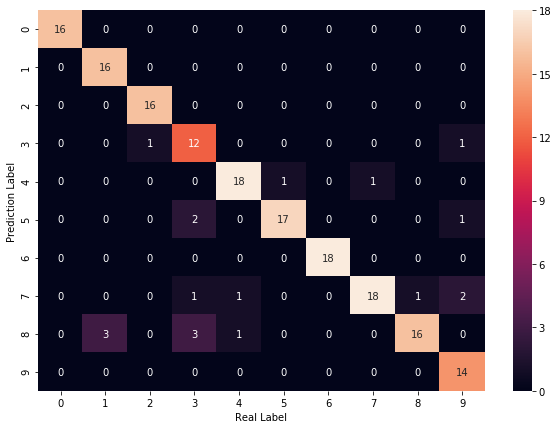

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:64 index:[5] real:5
#1 min_error:73 index:[3] real:2
#2 min_error:56 index:[8] real:8
#3 min_error:22 index:[0] real:0
#4 min_error:54 index:[1] real:1
#5 min_error:54 index:[7] real:7
#6 min_error:36 index:[6] real:6
#7 min_error:59 index:[3] real:3
#8 min_error:33 index:[2] real:2
#9 min_error:57 index:[1] real:1
#10 min_error:85 index:[7] real:7
#11 min_error:72 index:[7] real:4
#12 min_error:43 index:[6] real:6
#13 min_error:52 index:[3] real:3
#14 min_error:49 index:[1] real:1
#15 min_error:68 index:[3] real:3
#16 min_error:74 index:[7] real:9
#17 min_error:52 index:[1] real:1
#18 min_error:72 index:[7] real:7
#19 min_error:23 index:[6] real:6
#20 min_error:67 index:[8] real:8
#21 min_error:41 index:[4] real:4
#22 min_error:58 index:[3] real:3
#23 min_error:56 index:[1] real:1
#24 min_error:34 index:[4] real:4
#25 min_error:30 index:[0] real:0
#26 min_error:38 index:[5] real:5
#27 min_error:50 index:[3] real:3
#28 min_error:55 index:[6] real:6
#29 min_error:61 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9208410636982065
Avg Base Learner:0.7976796536796538


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

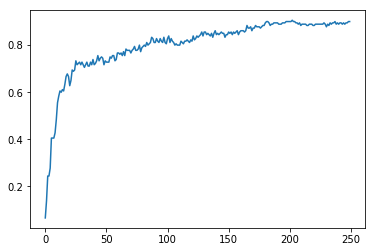

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4512 Total connections::4687
